# LendingClub Loan Approval

## Data Insight & Visualization

### Arya Pambudi Bayuaji

**Dataset:** LendingClub Loan Dataset | **Source:** [Kaggle](https://www.kaggle.com/prashdash112/lending-club-loan-two-new-version)

Data berasal dari perusahaan LendingClub 

Lending Club adalah perusahaan pinjaman peer-to-peer yang mencocokkan peminjam dengan investor melalui platform online. Perusahaan ini melayani orang-orang yang membutuhkan pinjaman pribadi antara 1.000 hingga 40.000. Peminjam menerima jumlah penuh dari pinjaman yang diterbitkan dikurangi biaya administrasi yang dibayarkan kepada perusahaan (platform penyedia). Investor mendapatkan keuntungan dari bunga serta diwajibkan membayar Lending Club dengan biaya layanan. Perusahaan membagikan data tentang semua pinjaman yang dikeluarkan melalui platformnya selama periode waktu tertentu.

Misi utama dari Project ini adalah untuk membuat Machine Learning dengan rasio peminjam dapat membayar penuh pinjamannya sebesar 85% yang secara tidak langsung mengurangi resiko credit macet sebelum diterima di LendingClub yang berbasis aplikasi untuk menentukan permintaan pinjaman berdasarkan data historis. 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [6]:
LCL = pd.read_csv('LendingClub_Loan_Data.csv')
LCL = LCL.drop('Unnamed: 0',axis=1)
LCL.head()

,loan_amnt,term,int_rate,annual_inc,loan_status,revol_bal
0,10000.0,36 months,11.44,117000.0,Fully Paid,36369.0
1,8000.0,36 months,11.99,65000.0,Fully Paid,20131.0
2,15600.0,36 months,10.49,43057.0,Fully Paid,11987.0
3,7200.0,36 months,6.49,54000.0,Fully Paid,5472.0
4,24375.0,60 months,17.27,55000.0,Charged Off,24584.0


In [7]:
def pie_chart(x,y) :

    plt.rcdefaults()
    sns.set(style="whitegrid")
    plt.style.use('seaborn')
    fig = plt.figure(figsize=(10,12))

    for a in range(1,LCL[x].nunique()+1) :
        ax1 = fig.add_subplot(LCL[x].nunique()//2+1,2,a)
        ax1.set_title(str(LCL[x].unique()[a-1]),loc='center')
        values = LCL.groupby(x).get_group(LCL[x].unique()[a-1])[y].value_counts()
        labels = list(LCL[y].value_counts().index)
        explode = [0.05]*LCL[y].nunique()
        plt.pie(values, labels=labels,explode=explode,
            startangle=90, autopct=lambda p:f'{p:.2f}%')
        plt.title(list(LCL.groupby(x)[y].unique().index)[a-1])

    plt.tight_layout()
    return plt.show()

In [8]:
def count_plot(z) :
    
    plt.rcdefaults()
    sns.set(style="whitegrid")
    plt.style.use('seaborn')
    fig, ax = plt.subplots()

    # Example data
    y = list(LCL[z].value_counts().sort_index().index)
    y_pos = np.arange(len(y))
    x = list(LCL[z].value_counts().sort_index().values)

    ax = sns.barplot(x=x, y=y,order=LCL.groupby(z)['loan_status'].unique().index)
    # ax.set_yticklabels(y)
    ax.set_xlabel('Borrower')
    ax.set_title(z)

    for a in y_pos :
        plt.text(100,a,f'Total Borrowers : {x[a]}')

    plt.show()

In [9]:
def dist_plot(x,bins) :
    
    plt.figure(figsize=(7,5))
    data = LCL[x]
    ax = sns.distplot(data, bins=bins)
    return plt.show()

In [10]:
def bar_plot(x,y, estimator) :
    plt.figure(figsize=(7,5))
    ax = sns.barplot(x=LCL[x], y=LCL[y], ci=None, alpha=0.7, order=list(LCL.groupby(x)[y].unique().index),
                 estimator=estimator, palette="Blues_d")
    return plt.show()

In [11]:
def df_summary(x,y,estimator) :

    if estimator == 'sum' :
        data = LCL.groupby(x)[y].sum()
    elif estimator == 'mean' :
        data = LCL.groupby(x)[y].mean()
    elif estimator == 'median' :
        data = LCL.groupby(x)[y].median()
    df = pd.DataFrame(data.values,columns=[f'{estimator} {y}'], index=data.index)
    return df

In [12]:
def df_count(x,y) :
    data = pd.DataFrame(LCL.groupby(x)[y].value_counts())
    data['%'] = [round(a,2) for a in LCL.groupby(x)[y].value_counts(normalize=True).values*100]
    data = data.rename(columns={y:'Count'})
    return data

### Percentage of Target

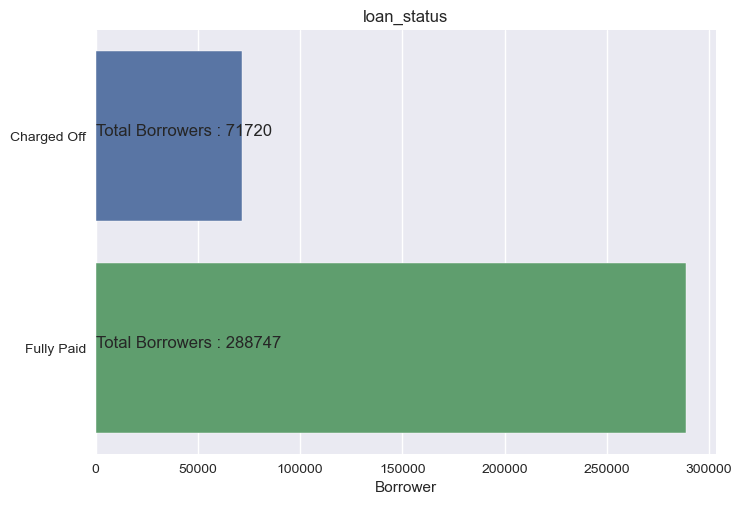

In [13]:
count_plot('loan_status')

In [27]:
288747+71720

360467

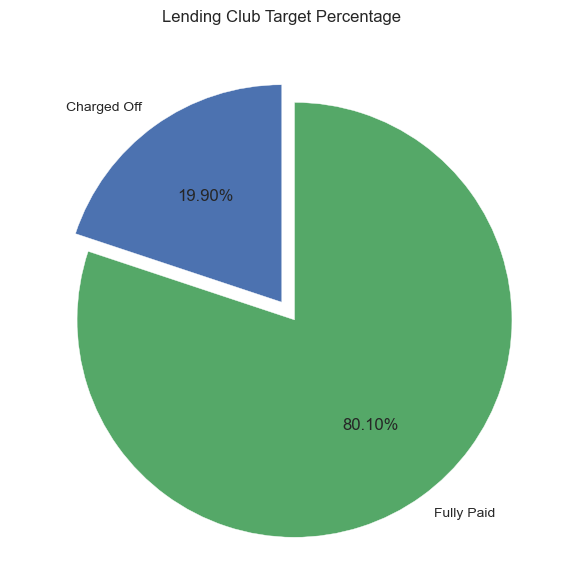

In [21]:
values = list(LCL['loan_status'].value_counts().sort_values().values)
labels = list(LCL['loan_status'].value_counts().sort_values().index)
explode = [0, 0.1]

plt.figure(figsize=(6,6))
plt.pie(values, labels=labels,explode=explode,
        startangle=90, autopct=lambda p:f'{p:.2f}%')
plt.title('Lending Club Target Percentage')
plt.tight_layout()
plt.show()

Terdapat 19.9% peminjaman yang bermasalah dilihat dari pie chart atau sebesar 71720 peminjam. Jika kondisi ini terjadi dan bertambah besar 
maka dapat mengakibatkan berkurangnya minat investor dan peminjam untuk menggunakan LendingClub yang berakibat profit dari perusahaan berkurang

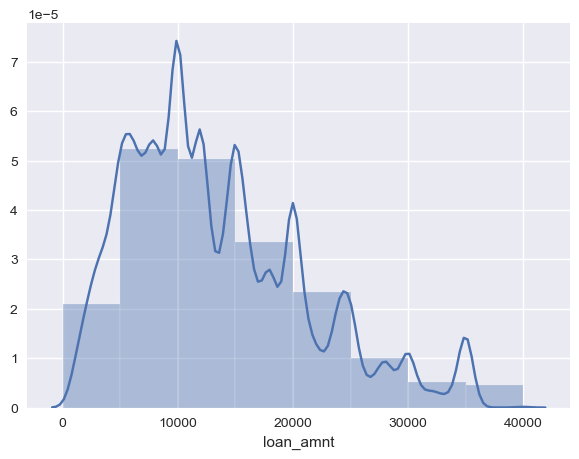

In [15]:
bins = np.arange(0,40001,5000)
dist_plot('loan_amnt',bins)

mayoritas peminjam meminjam pinjaman sekitar 5000 hingga 10000

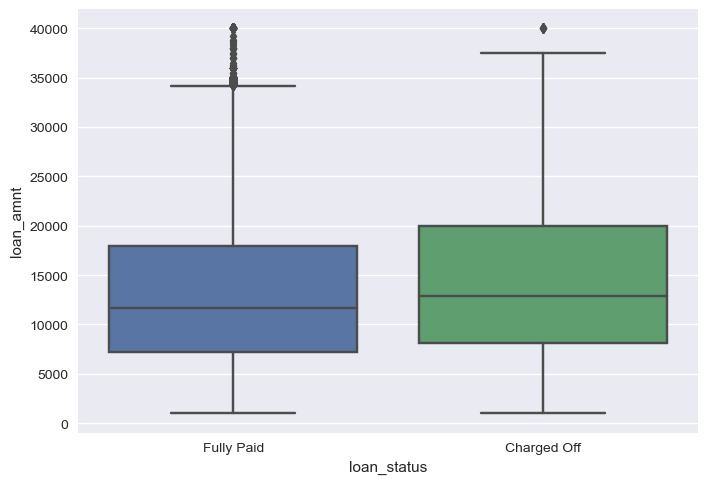

In [16]:
sns.boxplot(x='loan_status',y='loan_amnt',data=LCL)
plt.show()

In [23]:
df_summary('loan_status','loan_amnt','median')

,median loan_amnt
loan_status,
Charged Off,12875.0
Fully Paid,11700.0


Dilihat dari boxplot hanya dengan fitur loan_amnt akan sangat sulit membedakan karakteristik antara Fully Paid dan Charged Off, dengan median masing-masing yaitu Fully Paid 11700 dan Charged Off 12875

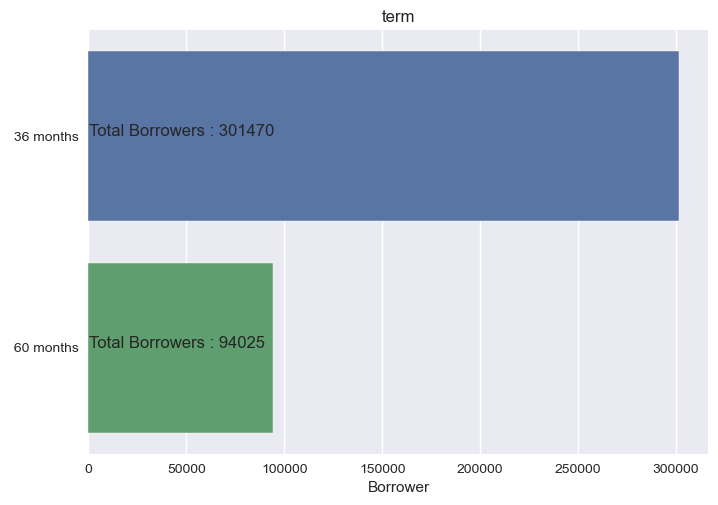

In [20]:
count_plot('term')

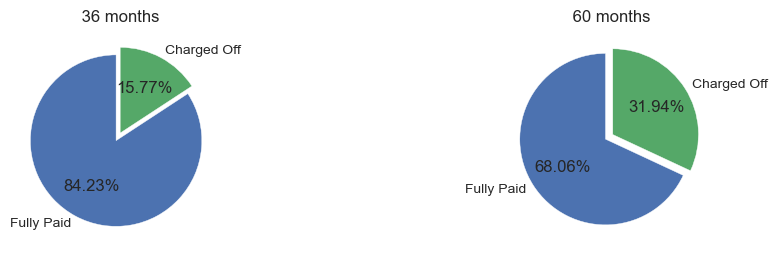

In [21]:
pie_chart('term','loan_status')

In [22]:
df_count('term','loan_status')

Count      %
term       loan_status               
 36 months Fully Paid   253917  84.23
           Charged Off   47553  15.77
 60 months Fully Paid    63992  68.06
           Charged Off   30033  31.94

In [ ]:
Untuk term 36 months sebanyak 15.77% bermasalah dengan sisanya 84.23% dapat membayar penuh pinjamannya atau Fully Paid
sedangkan untuk term 60 months sebanyak 31.94% bermasalah dengan sisanya 68.06% dapat membayar penuh pinjamannya atau Fully Paid

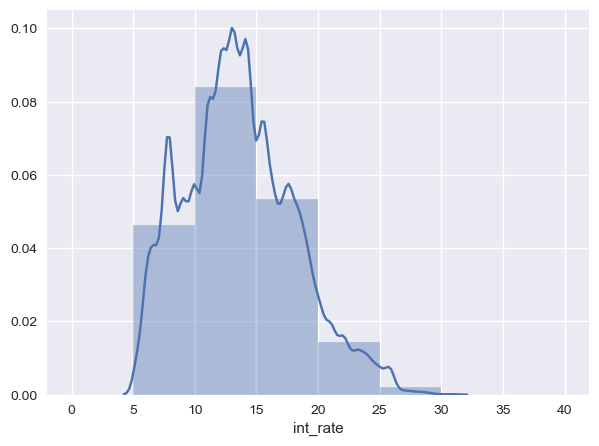

In [23]:
bins=np.arange(0,41,5)
dist_plot('int_rate',bins)

In [ ]:
mayoritas bunga pinjaman yang diberikan ke peminjam antara 10% hingga 15%

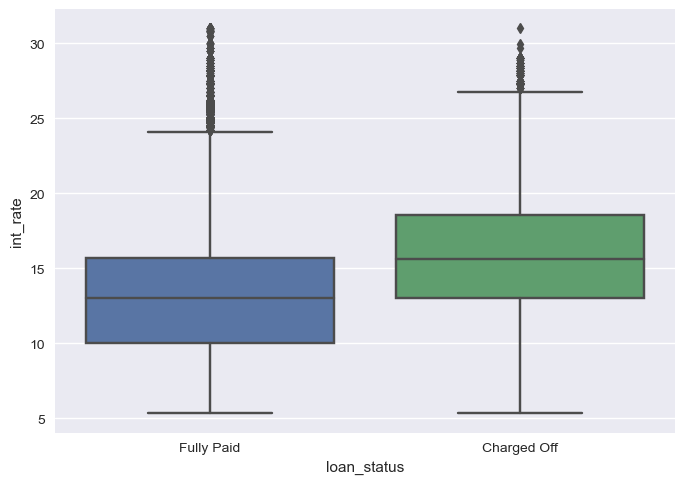

In [18]:
sns.boxplot(x='loan_status',y='int_rate',data=LCL)
plt.show()

In [24]:
df_summary('loan_status','int_rate','median')

,median int_rate
loan_status,
Charged Off,15.61
Fully Paid,12.99


Dilihat dari boxplot hanya dengan fitur loan_status dapat membedakan karakteristik antara Fully Paid dan Charged Off walaupun tidak terlalu baik, karena masih terdapat bagian boxplot Fully Paid dengan Charged Off yang beririsan, dengan median masing-masing yaitu Fully Paid 12.99 dan Charged Off 15.61

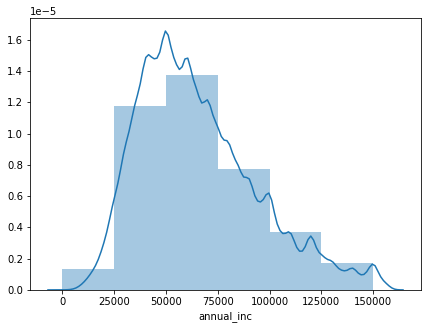

In [19]:
bins=np.arange(0,157500,25000)
dist_plot('annual_inc',bins)

mayoritas pendapatan per tahun dari peminjam yaitu diantara 50.000 hingga 75.000

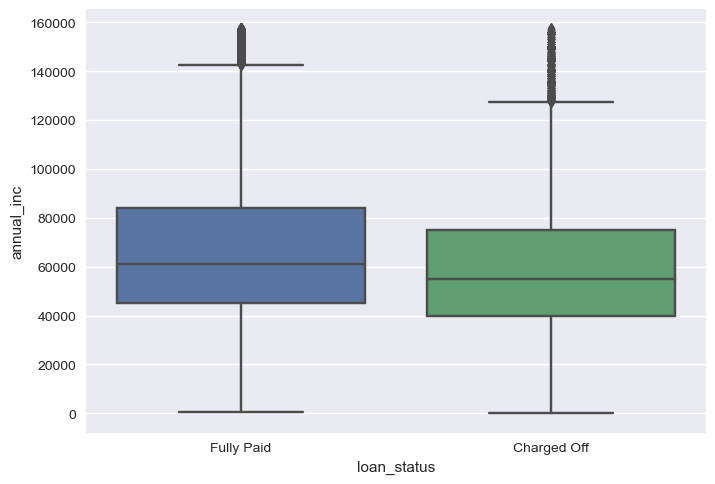

In [19]:
sns.boxplot(x='loan_status',y='annual_inc',data=LCL)
plt.show()

In [25]:
df_summary('loan_status','annual_inc','median')

,median annual_inc
loan_status,
Charged Off,55000.0
Fully Paid,61000.0


Dilihat dari boxplot hanya dengan fitur annual_inc akan sangat sulit membedakan karakteristik antara Fully Paid dan Charged Off, dengan median masing-masing yaitu Fully Paid 61000 dan Charged Off 55000

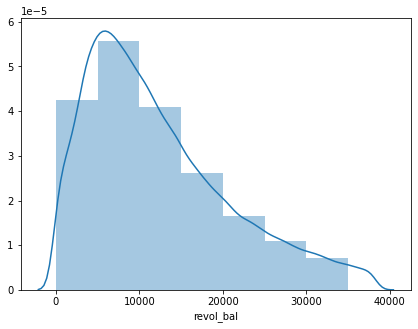

In [23]:
bins=np.arange(0,40000,5000)
dist_plot('revol_bal',bins)

mayoritas hutang yang masih dimilki peminjam yaitu diantara 5.000 hingga 10.000

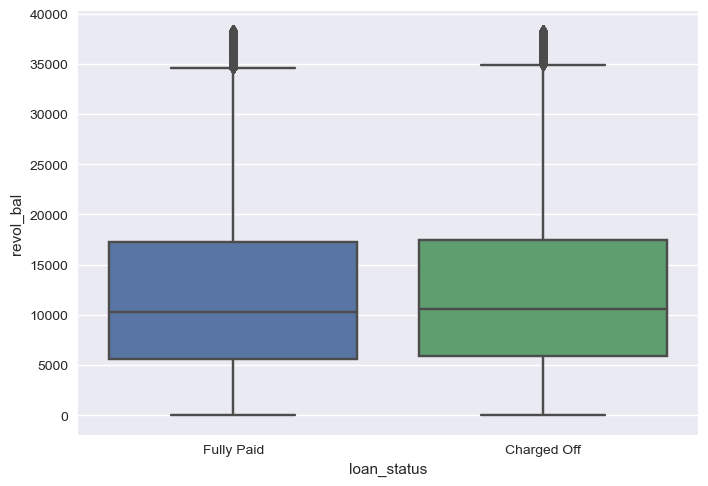

In [20]:
sns.boxplot(x='loan_status',y='revol_bal',data=LCL)
plt.show()

In [26]:
df_summary('loan_status','revol_bal','median')

,median revol_bal
loan_status,
Charged Off,10567.0
Fully Paid,10295.0


Dilihat dari boxplot hanya dengan fitur revol_bal akan sangat sulit membedakan karakteristik antara Fully Paid dan Charged Off, dengan median masing-masing yaitu Fully Paid 10295 dan Charged Off 10567